In [125]:
from sklearn.datasets import load_iris
from sklearn import tree
from IPython.display import Image  
import pydot
def createClassification(dataset, criterion, depth):
    clf = tree.DecisionTreeClassifier(criterion=criterion)
    clf = clf.fit(dataset.data, dataset.target)
    clf = create_tree_using_gene(dataset.data, dataset.target, depth)
    return clf

def classifyUsingDecisionTree(dataset, criterion, depth):
    clf = createClassification(dataset, criterion, depth)
    dot_data = tree.export_graphviz(clf, out_file=None, 
                                 feature_names=dataset.feature_names,  
                                 class_names=dataset.target_names,  
                                 filled=True)  
    graph = pydot.graph_from_dot_data(dot_data) 
    return graph

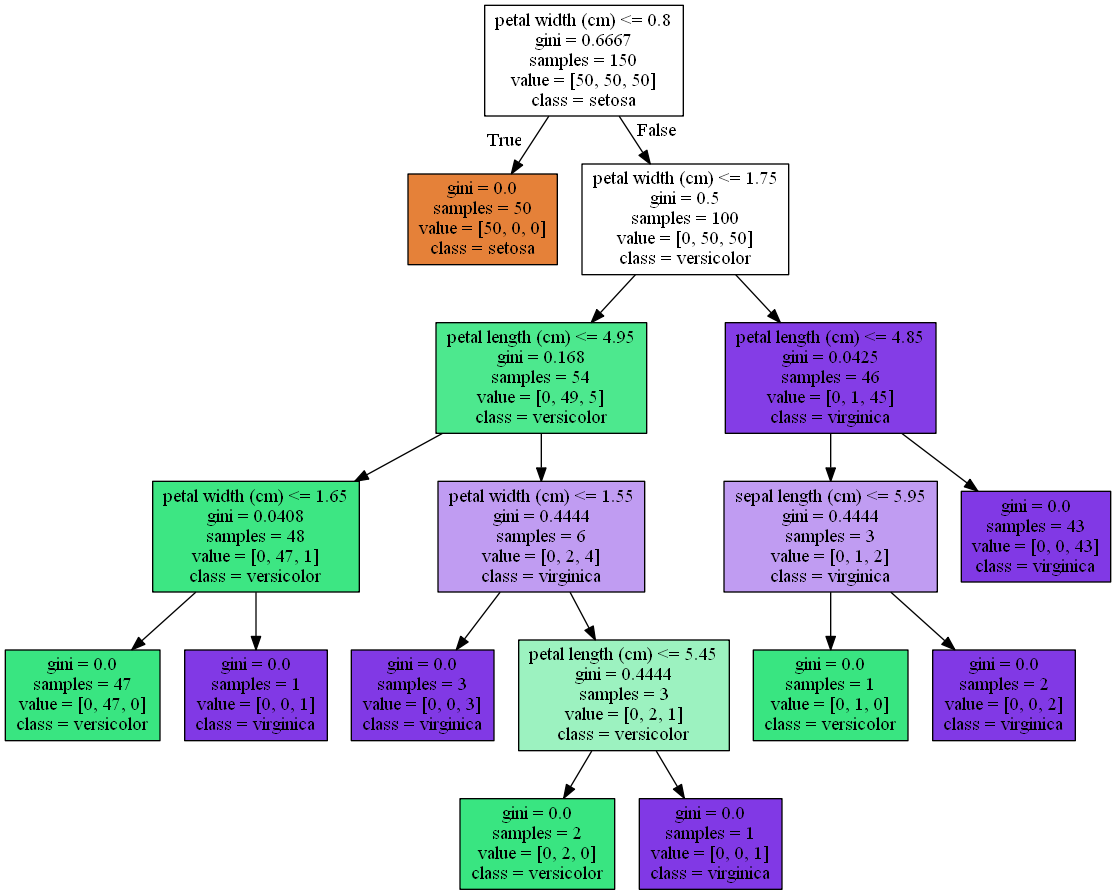

In [126]:
iris = load_iris()
#no depth limit
Image(classifyUsingDecisionTree(iris, criterion="gini", depth=999).create_png())

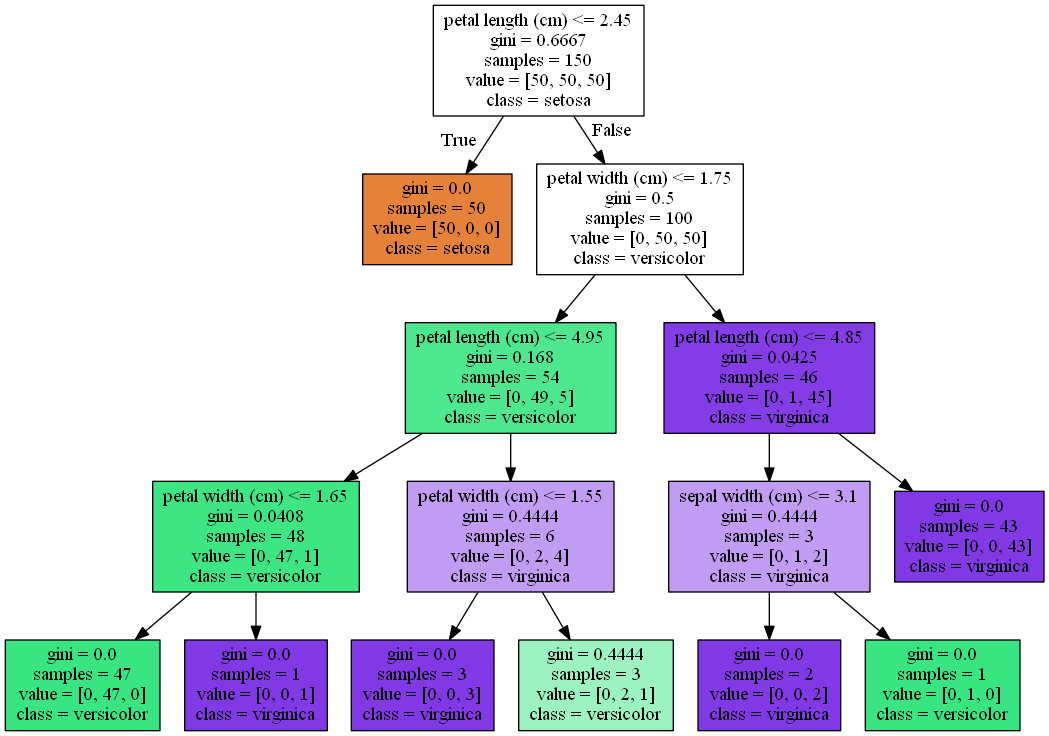

In [127]:
Image(classifyUsingDecisionTree(iris, criterion="gini", depth=4).create_png())

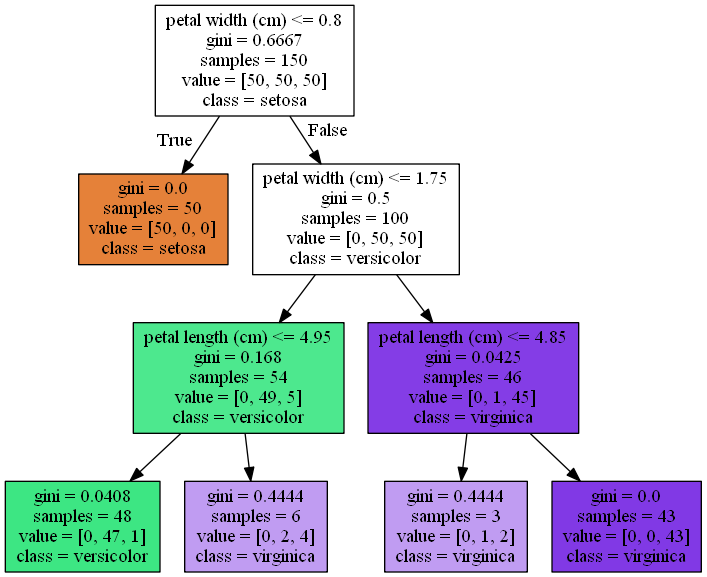

In [128]:
Image(classifyUsingDecisionTree(iris,criterion="gini", depth=3).create_png())

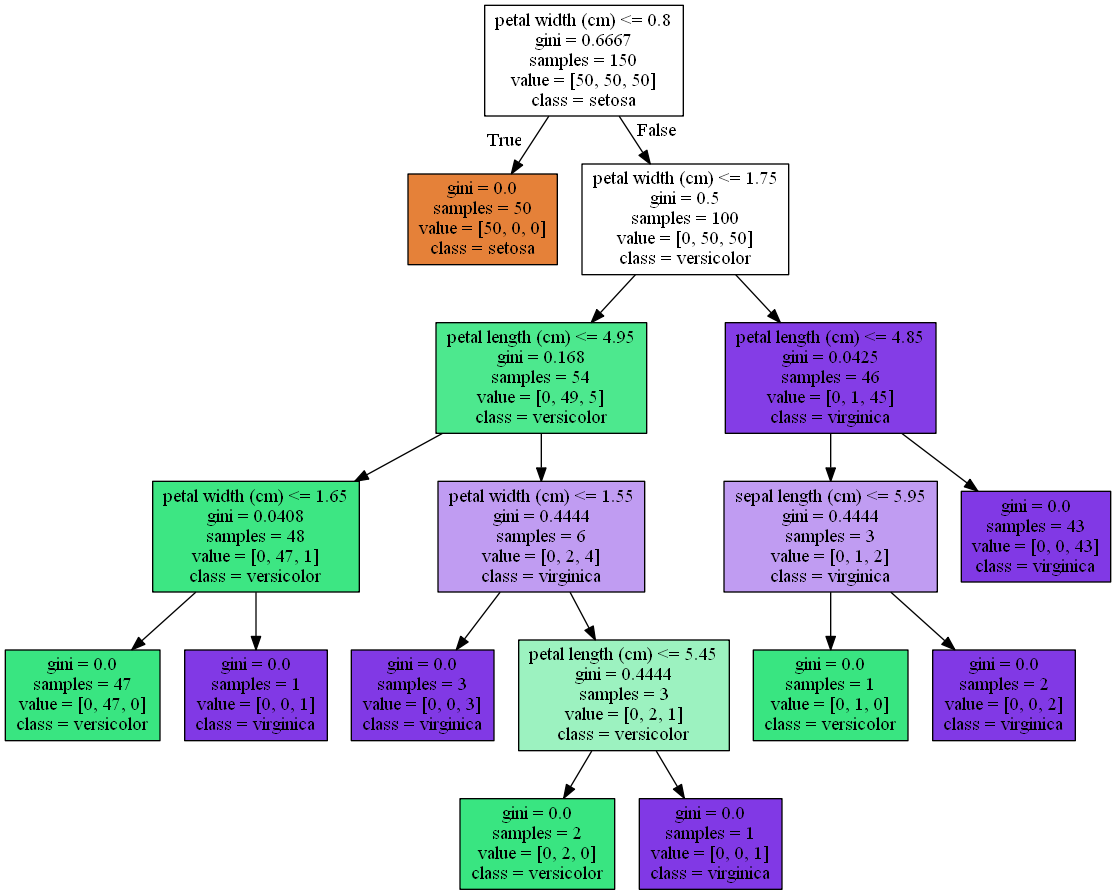

In [129]:
#no depth limit
Image(classifyUsingDecisionTree(iris,criterion="entropy", depth=999).create_png())

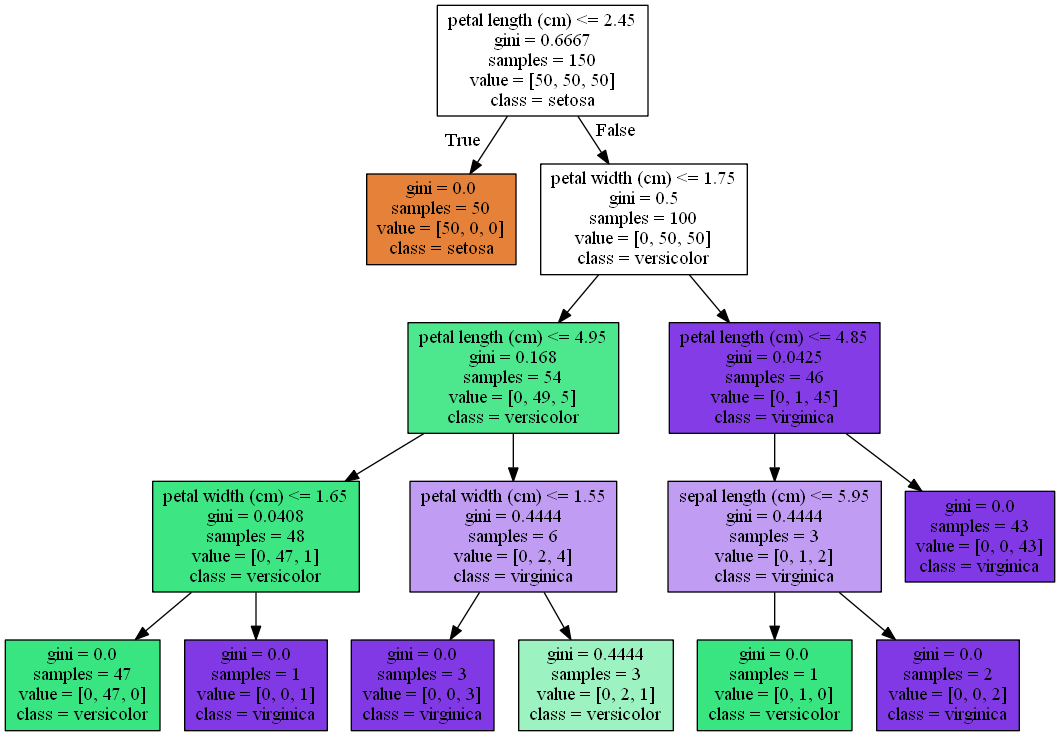

In [130]:
Image(classifyUsingDecisionTree(iris,criterion="entropy", depth=4).create_png())

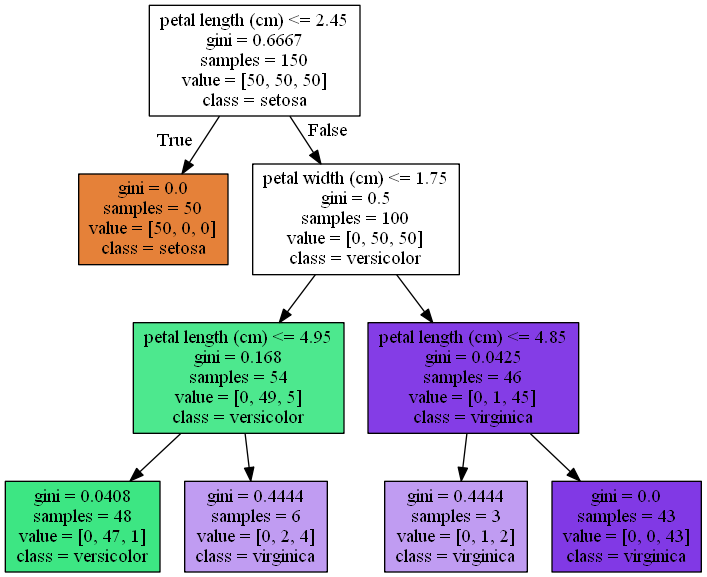

In [131]:
Image(classifyUsingDecisionTree(iris,criterion="entropy", depth=3).create_png())

In [179]:
from sklearn.model_selection import LeaveOneOut
class Object(object):
    pass

def findAccuracy(criterion, depth):
    errorCount = 0
    for train, test in LeaveOneOut().split(iris.data):        
        element = iris.data[test]    
        data = list()
        target = list()
        for i in train:
            data.append(iris.data[i])
            target.append(iris.target[i])    
        irisOneOut = Object()
        irisOneOut.data = data
        irisOneOut.target = target
        irisOneOut.feature_names = iris.feature_names
        irisOneOut.target_names = iris.target_names

        classifier = createClassification(irisOneOut,criterion, depth)
        if (iris.target[test]!=classifier.predict(element)):
            errorCount += 1
    print("criterion:", criterion, "depth:", depth, "accuracy:", (149-errorCount)/149*100, "errorCount:", errorCount)

In [181]:
for i in range(1,6):
    findAccuracy(criterion="gini", depth=i)
for i in range(1,6):
    findAccuracy(criterion="entropy", depth=i)    

criterion: gini depth: 1 accuracy: 32.88590604026846 errorCount: 100
criterion: gini depth: 2 accuracy: 95.30201342281879 errorCount: 7
criterion: gini depth: 3 accuracy: 94.63087248322147 errorCount: 8
criterion: gini depth: 4 accuracy: 95.30201342281879 errorCount: 7
criterion: gini depth: 5 accuracy: 95.30201342281879 errorCount: 7
criterion: entropy depth: 1 accuracy: 32.88590604026846 errorCount: 100
criterion: entropy depth: 2 accuracy: 95.30201342281879 errorCount: 7
criterion: entropy depth: 3 accuracy: 94.63087248322147 errorCount: 8
criterion: entropy depth: 4 accuracy: 94.63087248322147 errorCount: 8
criterion: entropy depth: 5 accuracy: 94.63087248322147 errorCount: 8


# Conclusion

In homework2, we have studied KNN algorithm on Iris dataset, applying leave-one-out method provided an accuracy ratio varying between 94,6% and 98%(observed for K=18).

According to results above, we can make following deductions: 

 1) There is no significant difference gini and information gain criteria options.

 2) Increarisng depth does not necessarily yield to a better classification (see gini-depth=2 vs gini-depth=3).

3) With a smart selection of K (18 is a good choice), KNN algoritm is a better classification option for Iris data set. This is most probably because Iris data set is very smooth and elements of the same type are grouped together. 